## Analysis of MovieLens Data - Part 2

The goal of the second part is to train linear regression models to predict users' ratings towards movies. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will continue using the cleaned movielens dataset from Part 1. 

### Importing the packages


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline

### Loading the cleaned dataset from Part 1

In [2]:
df = pd.read_csv('movielens_data_clean.csv')

In [3]:
print(f"Length of dataset: {len(df)}")

Length of dataset: 96854


 -------------------

### Exploring the cleaned dataset

In [4]:
df.head()

,userId,age,gender,occupation,movieId,rating,genre,timestamp
0,196,49.0,M,writer,242,3.0,Comedy,881250949
1,22,25.0,M,writer,377,1.0,Children,878887116
2,244,28.0,M,technician,51,2.0,Romance,880606923
3,298,44.0,M,executive,474,4.0,War,884182806
4,253,26.0,F,librarian,465,5.0,Adventure,891628467


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96854 entries, 0 to 96853
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   userId      96854 non-null  int64  
 1   age         96854 non-null  float64
 2   gender      96854 non-null  object 
 3   occupation  96854 non-null  object 
 4   movieId     96854 non-null  int64  
 5   rating      96854 non-null  float64
 6   genre       96854 non-null  object 
 7   timestamp   96854 non-null  int64  
dtypes: float64(2), int64(3), object(3)
memory usage: 5.9+ MB


#### There are 8 columns and 96854 rows.
#### To get the correlation matrix between age, gender, genre, occupation and rating, we'll first need to convert the given categorical features(gender, genre and occupation) into numerical features, and to do that we'll use OrdinalEncoder by sklearn.


In [6]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

In [7]:
# transforming the categorical features to numerical features

df[["gender","occupation", "genre"]] = enc.fit_transform(df[["gender","occupation", "genre"]])

In [8]:
# now that the categorical features have been converted into numerical, we can find the correlation matrix.

data = df[['age', 'gender', 'genre', 'occupation', 'rating']]
data.head()


,age,gender,genre,occupation,rating
0,49.0,1.0,4.0,19.0,3.0
1,25.0,1.0,3.0,19.0,1.0
2,28.0,1.0,13.0,18.0,2.0
3,44.0,1.0,16.0,6.0,4.0
4,26.0,0.0,1.0,10.0,5.0


In [9]:
# finding correlation between features

data.corr()

,age,gender,genre,occupation,rating
age,1.000000,0.037126,0.027286,-0.370879,0.051724
gender,0.037126,1.000000,-0.000509,0.012117,-0.007239
genre,0.027286,-0.000509,1.000000,-0.011443,0.045250
occupation,-0.370879,0.012117,-0.011443,1.000000,-0.033717
rating,0.051724,-0.007239,0.045250,-0.033717,1.000000


#### From the correlation matrix, it is evident that 'age' and 'genre' have positive correlation with 'rating' while 'occupation' and 'gender' have negative correlation with 'rating'. The correlation of a feature with itself is always 1, which is evident by looking at the slanting values in the correlation matrix. 
#### Also, 'age' and 'genre' have strong correlation with 'rating', while 'gender' and 'occupation' have the least correlation with 'rating'.
#### We don't take 'userId' and 'movieId' into account for correlation and training/testing since they are unique identifiers. 'timestamp' will also not be counted as a valid predictor to affect the model, in anyway.
 ----------------------------------------------------------

### Splitting Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set. 
* To further investigate whether the size of the training/testing data affects the model performance, we will randomly split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data. 

In [10]:
# CASE 1: splitting training data to contain 10% of the entire data
train_1, test_1 = train_test_split(data, train_size=0.1, random_state=2101)

# CASE 2: splitting training data to contain 90% of the entire data
train_2, test_2 = train_test_split(data, train_size=0.9, random_state=2101)

In [11]:
print("CASE 1: Length of the sets is: ")
print("Length of training data: ", train_1.shape)
print("Length of testing data: ", test_1.shape)

CASE 1: Length of the sets is: 
Length of training data:  (9685, 5)
Length of testing data:  (87169, 5)


In [12]:
print("CASE 2: Length of the sets is: ")
print("Length of training data: ", train_2.shape)
print("Length of testing data: ", test_2.shape)

CASE 2: Length of the sets is: 
Length of training data:  (87168, 5)
Length of testing data:  (9686, 5)


#### The length of testing and training sets in Case 1 and 2 have been printed.
 ----------------------------------------------------------

# Training Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results. 
* To investigate whether feature selection affects the model performance, we will select two most correlated features and two least correlated features regarding rating, respectively. 
* Training four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

### 'age' and 'genre' are two most correlated features with 'rating', while 'gender' and 'occupation' have the least correlation with 'rating'.

In [13]:
# Model-a: Two most correlated features to 'rating' are 'genre' and 'age', Case 1 

x_train_1 = train_1[['genre', 'age']]
y_train_1 = train_1['rating']
x_test_1 = test_1[['genre', 'age']]
y_test_1 = test_1['rating']

# Training stage for Model-a
reg1 = linear_model.LinearRegression()
reg1.fit(x_train_1, y_train_1)


LinearRegression()

In [14]:
# Model-b: Two least correlated features to 'rating' are 'occupation' and 'gender', Case 1 

X_train_1 = train_1[['occupation', 'gender']]
Y_train_1 = train_1['rating']
X_test_1 = test_1[['occupation', 'gender']]
Y_test_1 = test_1['rating']

# Training stage for Model-b
reg2 = linear_model.LinearRegression()
reg2.fit(X_train_1, Y_train_1)

LinearRegression()

In [15]:
# Model-c: Two most correlated features to 'rating' are 'genre' and 'age', Case 2 

x_train_2 = train_2[['genre', 'age']]
y_train_2 = train_2['rating']
x_test_2 = test_2[['genre', 'age']]
y_test_2 = test_2['rating']

# Training stage for Model-c
reg3 = linear_model.LinearRegression()
reg3.fit(x_train_2, y_train_2)

LinearRegression()

In [16]:
# Model-d: Two least correlated features to 'rating' are 'occupation' and 'gender', Case 2

X_train_2 = train_2[['occupation', 'gender']]
Y_train_2 = train_2['rating']
X_test_2 = test_2[['occupation', 'gender']]
Y_test_2 = test_2['rating']

# Training stage for Model-d
reg4 = linear_model.LinearRegression()
reg4.fit(X_train_2, Y_train_2)

LinearRegression()

 ----------------------------------------------------------

### Evaluating the models
The performance of the four models with two metrics, including [MSE](https://en.wikipedia.org/wiki/Mean_squared_error) and [Root MSE](https://en.wikipedia.org/wiki/Root-mean-square_deviation)

In [17]:
# evaluation of Model-a

trainprediction_1 = reg1.predict(x_train_1)
train_mse_1 = mean_squared_error(y_train_1, trainprediction_1)
train_rmse_1 = np.sqrt(train_mse_1)
r2_1 = r2_score(y_train_1, trainprediction_1)
print("Train set performance of Model-a: ")
print("MSE: ", train_mse_1)
print("Root MSE: ", train_rmse_1)
print("R-Squared: ", r2_1)

testprediction_1 = reg1.predict(x_test_1)
test_mse_1 = mean_squared_error(y_test_1, testprediction_1)
test_rmse_1 = np.sqrt(test_mse_1)
r2_2 = r2_score(y_test_1, testprediction_1)
print("\nTest set performance of Model-a: ")
print("MSE: ", test_mse_1)
print("Root MSE: ",test_rmse_1)
print("R-Squared: ", r2_2)

Train set performance of Model-a: 
MSE:  1.2446675457976792
Root MSE:  1.115646693984112
R-Squared:  0.005433180932044479

Test set performance of Model-a: 
MSE:  1.2396814246537344
Root MSE:  1.113409818824019
R-Squared:  0.004149052256836372


In [18]:
# evaluation of Model-b
trainprediction_2 = reg2.predict(X_train_1)
train_mse_2 = mean_squared_error(Y_train_1, trainprediction_2)
train_rmse_2 = np.sqrt(train_mse_2)
r2_3 = r2_score(Y_train_1, trainprediction_2)
print("Train set performance of Model-b: ")
print("MSE: ", train_mse_2)
print("Root MSE: ", train_rmse_2)
print("R-Squared: ", r2_3)

testprediction_2 = reg2.predict(X_test_1)
test_mse_2 = mean_squared_error(Y_test_1, testprediction_2)
test_rmse_2 = np.sqrt(test_mse_2)
r2_4 = r2_score(Y_test_1, testprediction_2)
print("\nTest set performance of Model-b: ")
print("MSE: ", test_mse_2)
print("Root MSE: ", test_rmse_2)
print("R-Squared: ", r2_4)

Train set performance of Model-b: 
MSE:  1.249333759474045
Root MSE:  1.1177359972167153
R-Squared:  0.0017045858474669107

Test set performance of Model-b: 
MSE:  1.2435587998944895
Root MSE:  1.1151496760051942
R-Squared:  0.0010343102501628731


In [19]:
# evaluation of Model-c
trainprediction_3 = reg3.predict(x_train_2)
train_mse_3 = mean_squared_error(y_train_2, trainprediction_3)
train_rmse_3 = np.sqrt(train_mse_3)
r2_5 = r2_score(y_train_2, trainprediction_3)
print("Train set performance of Model-c: ")
print("MSE: ", train_mse_3)
print("Root MSE: ", train_rmse_3)
print("R-Squared: ", r2_5)

testprediction_3 = reg3.predict(x_test_2)
test_mse_3 = mean_squared_error(y_test_2, testprediction_3)
test_rmse_3 = np.sqrt(test_mse_3)
r2_6 = r2_score(y_test_2, testprediction_3)
print("\nTest set performance of Model-c: ")
print("MSE: ", test_mse_3)
print("Root MSE: ", test_rmse_3)
print("R-Squared: ", r2_6)

Train set performance of Model-c: 
MSE:  1.2408857941709557
Root MSE:  1.1139505348851697
R-Squared:  0.004618113260420276

Test set performance of Model-c: 
MSE:  1.2299137504463262
Root MSE:  1.109014765657485
R-Squared:  0.0040976367479381715


In [20]:
# evaluation of Model-d
trainprediction_4 = reg4.predict(X_train_2)
train_mse_4 = mean_squared_error(Y_train_2, trainprediction_4)
train_rmse_4 = np.sqrt(train_mse_4)
r2_7 = r2_score(Y_train_2, trainprediction_4)
print("Train set performance of Model-b: ")
print("MSE: ", train_mse_4)
print("Root MSE: ", train_rmse_4)
print("R-Squared: ", r2_7)

testprediction_4 = reg4.predict(X_test_2)
test_mse_4 = mean_squared_error(Y_test_2, testprediction_4)
test_rmse_4 = np.sqrt(test_mse_4)
r2_8 = r2_score(Y_test_2, testprediction_4)
print("\nTest set performance of Model-d: ")
print("MSE: ", test_mse_4)
print("Root MSE: ", test_rmse_4)
print("R-Squared: ", r2_8)

Train set performance of Model-b: 
MSE:  1.2452011782233021
Root MSE:  1.1158858266970246
R-Squared:  0.0011565093479504185

Test set performance of Model-d: 
MSE:  1.233611303958696
Root MSE:  1.1106805589181328
R-Squared:  0.0011036038087310907


 --------------------

### Visualising, Comparing and Analyzing the results

#### 1. Visualising the (mse and root mse) and Models(a & b) 

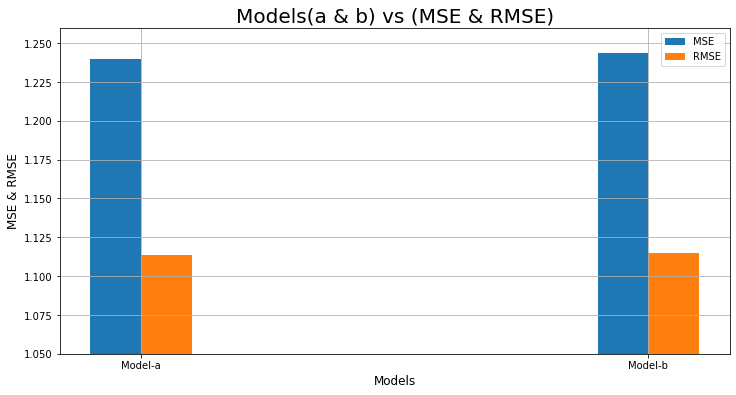

In [21]:
model1_list = ['Model-a','Model-b']
mse1_list = [test_mse_1, test_mse_2]
rmse1_list = [test_rmse_1, test_rmse_2]
xpos = np.arange(len(model1_list))
plt.figure(figsize=(12,6))
plt.bar(xpos, mse1_list, width=0.1, label="MSE")
plt.bar(xpos+0.1, rmse1_list, width=0.1, label="RMSE")
plt.title("Models(a & b) vs (MSE & RMSE)", size=20)
plt.xlabel('Models', size=12)
plt.ylabel('MSE & RMSE', size=12)
plt.grid(True)
plt.ylim([1.05,1.26])
plt.xticks(xpos+0.05, model1_list)
plt.legend()
plt.show()

#### We can see that both the mean squared error value(mse) and root mean squared error value(rmse) of model-b are slightly larger than those of model-a. This means that the model with least correlation features in respect to rating have larger mse and rmse values, hence, making model-b less suitable i.e. more the mse and rmse, more the chance of errors in the model.
------

#### 2. Visualising the (mse and root mse) and Models(c & d) 

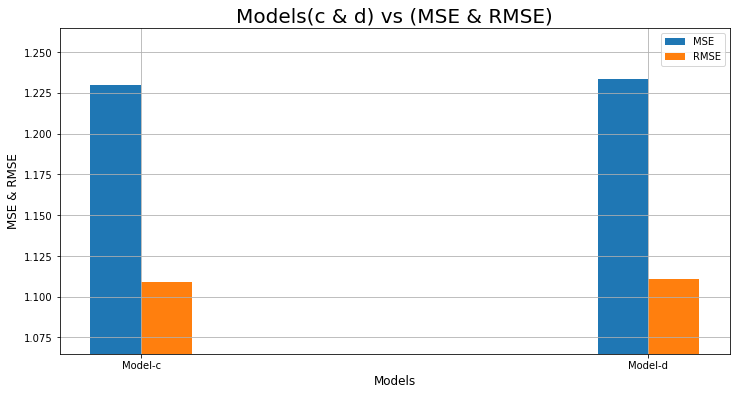

In [22]:
model2_list = ['Model-c','Model-d']
mse2_list = [test_mse_3, test_mse_4]
rmse2_list = [test_rmse_3, test_rmse_4]
xpos = np.arange(len(model2_list))
plt.figure(figsize=(12,6))
plt.grid(True)
plt.bar(xpos, mse2_list, width=0.1, label="MSE")
plt.bar(xpos+0.1, rmse2_list, width=0.1, label="RMSE")
plt.xlabel('Models', size=12)
plt.title("Models(c & d) vs (MSE & RMSE)", size=20)
plt.ylabel('MSE & RMSE', size=12)
plt.ylim([1.065,1.265])
plt.xticks(xpos+0.05, model2_list)
plt.legend()
plt.show()

#### We can see that both the mean squared error value(mse) and root mean squared error value(rmse) of model-d are slightly larger than those of model-c. This means that the model with least correlation features in respect to rating have larger mse and rmse values, hence, making model-d less suitable i.e. more the mse and rmse, more the chance of errors in the model.
-----------------

#### 3. Visualising the (mse and root mse) and Models(a & c) -- Strong Correlations

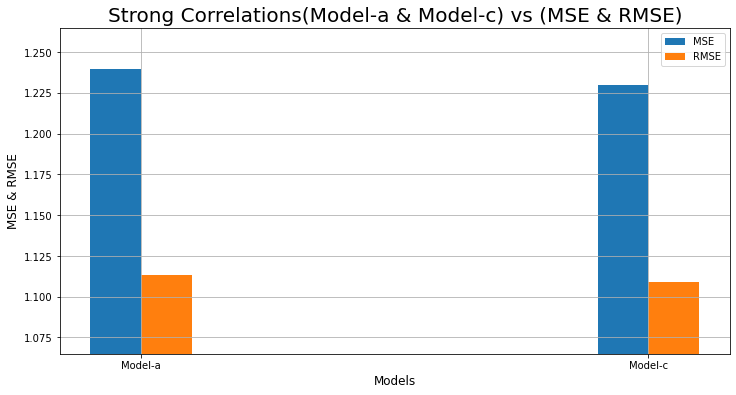

In [23]:
model3_list = ['Model-a','Model-c']
mse3_list = [test_mse_1, test_mse_3]
rmse3_list = [test_rmse_1, test_rmse_3]
xpos = np.arange(len(model2_list))
plt.figure(figsize=(12,6))
plt.bar(xpos, mse3_list, width=0.1, label="MSE")
plt.bar(xpos+0.1, rmse3_list, width=0.1, label="RMSE")
plt.title("Strong Correlations(Model-a & Model-c) vs (MSE & RMSE)", size=20)
plt.xlabel('Models', size=12)
plt.ylabel('MSE & RMSE', size=12)
plt.grid(True)
plt.ylim([1.065,1.265])
plt.xticks(xpos+0.05, model3_list)
plt.legend()
plt.show()

#### We can see that both the mean squared error value(mse) and root mean squared error value(rmse) of model-c are slightly larger than those of model-a. This means that the model with larger testing set will have larger mse and rmse values, hence, making model-c less suitable i.e. more the mse and rmse, more the chance of errors in the model.
--------------

#### 4. Visualising the (mse and root mse) and Models(b & d) -- Weak Correlations

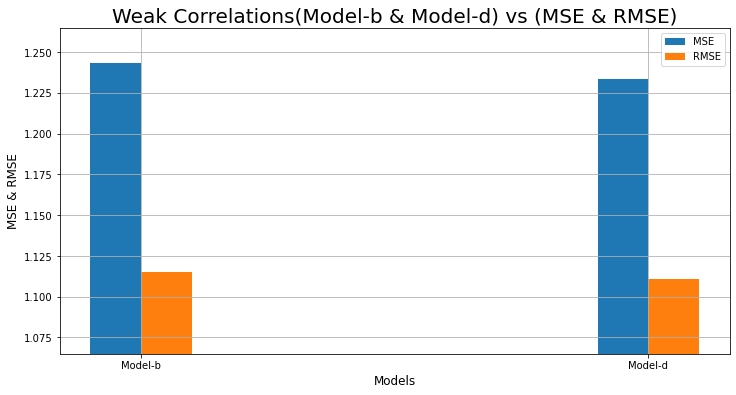

In [24]:
model4_list = ['Model-b','Model-d']
mse4_list = [test_mse_2, test_mse_4]
rmse4_list = [test_rmse_2, test_rmse_4]
xpos = np.arange(len(model4_list))
plt.figure(figsize=(12,6))
plt.bar(xpos, mse4_list, width=0.1, label="MSE")
plt.bar(xpos+0.1, rmse4_list, width=0.1, label="RMSE")
plt.title("Weak Correlations(Model-b & Model-d) vs (MSE & RMSE)", size=20)
plt.xlabel('Models', size=12)
plt.ylabel('MSE & RMSE', size=12)
plt.grid(True)
plt.ylim([1.065,1.265])
plt.xticks(xpos+0.05, model4_list)
plt.legend()
plt.show()

#### We can see that both the mean squared error value(mse) and root mean squared error value(rmse) of model-d are slightly larger than those of model-b. This means that the model with larger testing set will have larger mse and rmse values, hence, making model-d less suitable i.e. more the mse and rmse, more the chance of errors in the model.
----------------

## *SUMMARY*

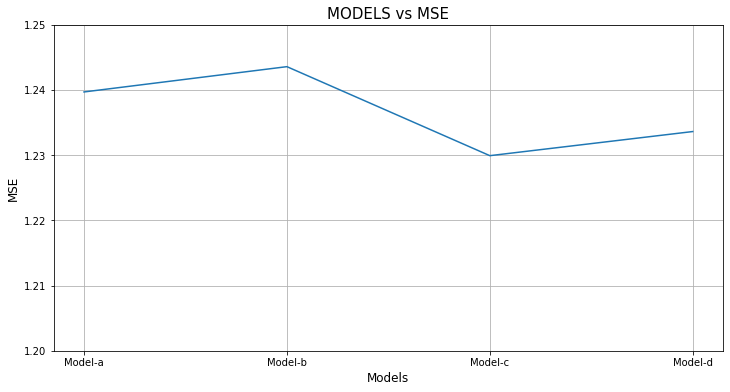

In [25]:
model5_list = ['Model-a','Model-b','Model-c','Model-d']
mse5_list = [test_mse_1,test_mse_2,test_mse_3,test_mse_4]
plt.figure(figsize=(12,6))
sns.lineplot(x=model5_list, y=mse5_list)
plt.title("MODELS vs MSE", size=15)
plt.xlabel('Models', size=12)
plt.ylabel('MSE', size=12)
plt.grid(True)
plt.ylim([1.2,1.25])
plt.show()

### Models vs RMSE graph will show same visual but with different values, since, $rmse = sqrt(mse)$, so we can summarise with this graph.
### Evidence from the lineplot:
    1) Model-a: lowest mse; therefore will have the lowest rmse; smallest training set
    2) Model-b: low mse; therefore will have the low rmse; smallest training set
    3) Model-c: high mse; therefore will have the high rmse; largest training set
    4) Model-d: highest mse; therefore will have the highest rmse; largest training set

### We can conclude that the model with the most training set and strong correlations has the best results i.e. lowest mse and rmse, therefore least chances of error --> most suitable.



-------------------------------------------------